# The Anscombe's Quartet Dataset

## Background of the Dataset

<p align="center">
  <img src="Francis_Anscombe.jpg">
  <br><b>Francis Anscombe</b><br>

Anscombe's quartet was developed by Frank Anscombe in 1973. [1] It consists of 4 datasets. Each dataset has 11 (x, y) pairs. The dataset was developed in order to illustrate the importance of constructing graphs. He believed that graphs should be produced as they help us perceive and appreciate some broad features of the data and they help us look behind those features to see what else is there. [2] Each dataset has similar summary statistics but look much different when viewed in a graph. 


## Descriptive Statistics

Firstly we will read the csv file into a dataframe. The csv file can be found [here](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/anscombe.csv).

In [1]:
import pandas as pd

df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/anscombe.csv")
                 
df

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
0,1,10,10,10,8,8.04,9.14,7.46,6.58
1,2,8,8,8,8,6.95,8.14,6.77,5.76
2,3,13,13,13,8,7.58,8.74,12.74,7.71
3,4,9,9,9,8,8.81,8.77,7.11,8.84
4,5,11,11,11,8,8.33,9.26,7.81,8.47
5,6,14,14,14,8,9.96,8.10,8.84,7.04
6,7,6,6,6,8,7.24,6.13,6.08,5.25
7,8,4,4,4,19,4.26,3.10,5.39,12.50
8,9,12,12,12,8,10.84,9.13,8.15,5.56
9,10,7,7,7,8,4.82,7.26,6.42,7.91


We can see from above that the csv file contains 9 columns the first contains the row numbers and the remaining 8 contain the x and y values for the datasets.

Showing all the rows for dataset 1 can be done as follows:

In [2]:
df.loc[:,['x1', 'y1']]

,x1,y1
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


The summary statistics are:

In [3]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,6.000000,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,1.000000,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,3.500000,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,6.000000,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,8.500000,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,11.000000,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


All have a count of 11

Mean of x's = 9.000000

Mean of y's = 7.50 (correct to 2 d.p.)

Standard deviation of x's = 3.316625

Standard deviation of y's = 2.03 (correct to 2 d.p.)

### Determining the linear regression line and correlation coefficients

In [5]:
# Adapted from https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy 
from scipy.stats import linregress

# Assigning the columns to variables
x1 = df.loc[:,'x1']
x2 = df.loc[:,'x2']
x3 = df.loc[:,'x3']
x4 = df.loc[:,'x4']

y1 = df.loc[:,'y1']
y2 = df.loc[:,'y2']
y3 = df.loc[:,'y3']
y4 = df.loc[:,'y4']

# Assigning the output of linregress to variables
slope1, intercept1, rvalue1, pvalue1, stderr1 = linregress(x1,y1)
slope2, intercept2, rvalue2, pvalue2, stderr2 = linregress(x2,y2)
slope3, intercept3, rvalue3, pvalue3, stderr3 = linregress(x3,y3)
slope4, intercept4, rvalue4, pvalue4, stderr4 = linregress(x4,y4)

# Printing the values for the slope, intercept and correlation coefficient
print(f"The linear regression lines for each data set have the following values:")
print(f"The slopes are: {slope1},{slope2},{slope3} and {slope4}")
print(f"The y intercepts are: {intercept1}, {intercept2}, {intercept3} and {intercept4}")
print(f"The correlation coefficients are: {rvalue1}, {rvalue2}, {rvalue3} and {rvalue4}")

The linear regression lines for each data set have the following values:
The slopes are: 0.5000909090909091,0.5000000000000001,0.4997272727272729 and 0.4999090909090909
The y intercepts are: 3.0000909090909103, 3.000909090909089, 3.002454545454544 and 3.0017272727272726
The correlation coefficients are: 0.8164205163448399, 0.816236506000243, 0.8162867394895984 and 0.8165214368885028


We can see that the linear regression lines for each dataset is y= 0.5x + 3.00 (m correct to 1 d.p. and c correct to 2 d.p.)
The correlation coefficients are equal to 0.82 (correct to 2 d.p.)

The summary statistics would lead you to believe that the datasets are very similar. However, as we will see, visualising the datasets shows that this is not true.

## Plotting the Dataset

Plotting the datasets and the linear regression line determined above:

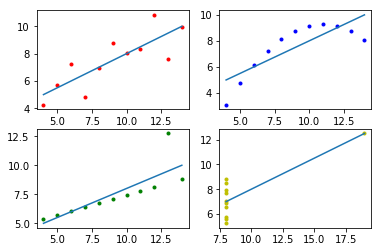

In [7]:
# Subplots from https://matplotlib.org/gallery/specialty_plots/anscombe.html
# Linear regression plotting from https://plot.ly/matplotlib/linear-fits/

import numpy as np
import matplotlib.pyplot as plt

# Function to return minimum x values to produce linear regression line
def xLine(xVal):
    return np.array([np.min(xVal), np.max(xVal)])

# Function to return y values for passed x values to produce linear regression line determined above
def yLine(xArray):
    return 0.5 * xArray  + 3.00

# Plotting the datasets
plt.subplot(221)
plt.plot(x1, y1, 'r.', xLine(x1), yLine(xLine(x1)))

plt.subplot(222)
plt.plot(x2, y2, 'b.', xLine(x2), yLine(xLine(x2)))

plt.subplot(223)
plt.plot(x3, y3, 'g.', xLine(x3), yLine(xLine(x3)))

plt.subplot(224)
plt.plot(x4, y4, 'y.', xLine(x4), yLine(xLine(x4)))

plt.show()

Here we can see that the datasets are vastly different to each other. This illustrates the importance of visualising a dataset as well as doing summary statistics.

## Why the Dataset is Interesting

The Anscombe Quartet datasets illustrate why it's important to graph a dataset and not just rely on summary statistics. For the first dataset the points appear as would be expected with a well fitting linear model. [3] However, the remaining three do not. In the second dataset the points lay on a curve and therefore a linear regression in this instance is not appropriate. In the third dataset the points appear to all lay on a straight line apart from an outlier. This outlier has a great effect on the linear regression. It may be necessary to remove the outlier and perform a linear regression with this removed. In the fourth example there doesn't appear to be any relationship between the x and y values except when the outlier is taken into account. 

For datasets three and four the standard regression calculation should be accompanied with a warning that one observation has played a critical role. [1]


## References

[1] Wikipedia. Anscombe quartet.
[https://en.wikipedia.org/wiki/Anscombe%27s_quartet]

[2] San Jose State University. Graphs in Statistical Analysis.
[https://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf]

[3] Eager Eyes. Anscombe's Quartet.
https://eagereyes.org/criticism/anscombes-quartet
